#  **Boston House Price Prediction by ( Machin Learning & Deep Learning ) Algorithms**

<img src="https://images.unsplash.com/photo-1580587771525-78b9dba3b914?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60" width="500" height="300" />

# **Business Priorities**

# Real estate economics

Real estate economics is the application of economic techniques to real estate markets. It tries to describe, explain, and predict patterns of prices, supply, and demand. The closely related field of housing economics is narrower in scope, concentrating on residential real estate markets, while the research on real estate trends focuses on the business and structural changes affecting the industry. 

# Use Case

**Housing Price Prediction Problem** 


The dataset describes 13 numerical properties of houses in Boston.
Those properties are concerned with modeling the price of houses in those suburbs in thousands of dollars. 
As such, this is a regression predictive modeling problem. Input attributes details are defined below.

**Regression Predictive Modeling Problem**

# **Data Analysis and Hypothesis Testing**

**DataSet Details :**

o	capitaCrimeRate - per capita crime rate by town

o	residenLandZone - proportion of residential land zoned for lots over 25,000 sq.ft.

o	nonRetailBusinessAcres - proportion of non-retail business acres per town.

o	trackBoundRiver - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

o	nitricOxidesConcentra - nitric oxides concentration (parts per 10 million)

o	AvgNumRoom - average number of rooms per dwelling

o	buildingAge - proportion of owner-occupied units built prior to 1940

o	distanceEmployCenter - weighted distances to five Boston employment centres

o	radialHighWay - index of accessibility to radial highways

o	propertyTaxRate - full-value property-tax rate per 10,000

o	teacherRatioTown - pupil-teacher ratio by town

o	blackbyTown - 1000(Bk - 0.63) ^2 where Bk is the proportion of blacks by town

o	workingPoorNeighT - the percentage of homeowners in the neighborhood considered lower income group

o	medianValue - Median value of owner-occupied homes in 1000's



<Img src="https://images.unsplash.com/photo-1568092775154-7fa176a29c0f?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60">

# **Data Set Details : Data Analysis**

In [1]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "House Price (Boston) Prediction Data"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Data Set

Load Data

In [5]:
filename = ("../input/boston-house-prices/housing.csv")
names = ['capitaCrimeRate', 'residenLandZone', 'nonRetailBusinessAcres', 'trackBoundRiver', 'nitricOxidesConcentra', 'AvgNumRoom', 'buildingAge', 'distanceEmployCenter', 'radialHighWay', 'propertyTaxRate', 'teacherRatioTown', 'blackbyTown', 'workingPoorNeigh', 'medianValue']
df = read_csv(filename, delim_whitespace=True, names=names)

In [6]:
df.head(20)

,capitaCrimeRate,residenLandZone,nonRetailBusinessAcres,trackBoundRiver,nitricOxidesConcentra,AvgNumRoom,buildingAge,distanceEmployCenter,radialHighWay,propertyTaxRate,teacherRatioTown,blackbyTown,workingPoorNeigh,medianValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
df.describe()

,capitaCrimeRate,residenLandZone,nonRetailBusinessAcres,trackBoundRiver,nitricOxidesConcentra,AvgNumRoom,buildingAge,distanceEmployCenter,radialHighWay,propertyTaxRate,teacherRatioTown,blackbyTown,workingPoorNeigh,medianValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Quality Assessment

**Data quality assessment (DQA)** is the process of scientifically and statistically evaluating data in order to determine whether they meet the quality required for projects or business processes and are of the right type and quantity to be able to actually support their intended use.

# Scatter Plot Matrix

A scatter plot matrix is table of scatter plots. Each plot is small so that many plots can be fit on a page. When you need to look at several plots, such as at the beginning of a multiple regression analysis, a scatter plot matrix is a very useful tool.

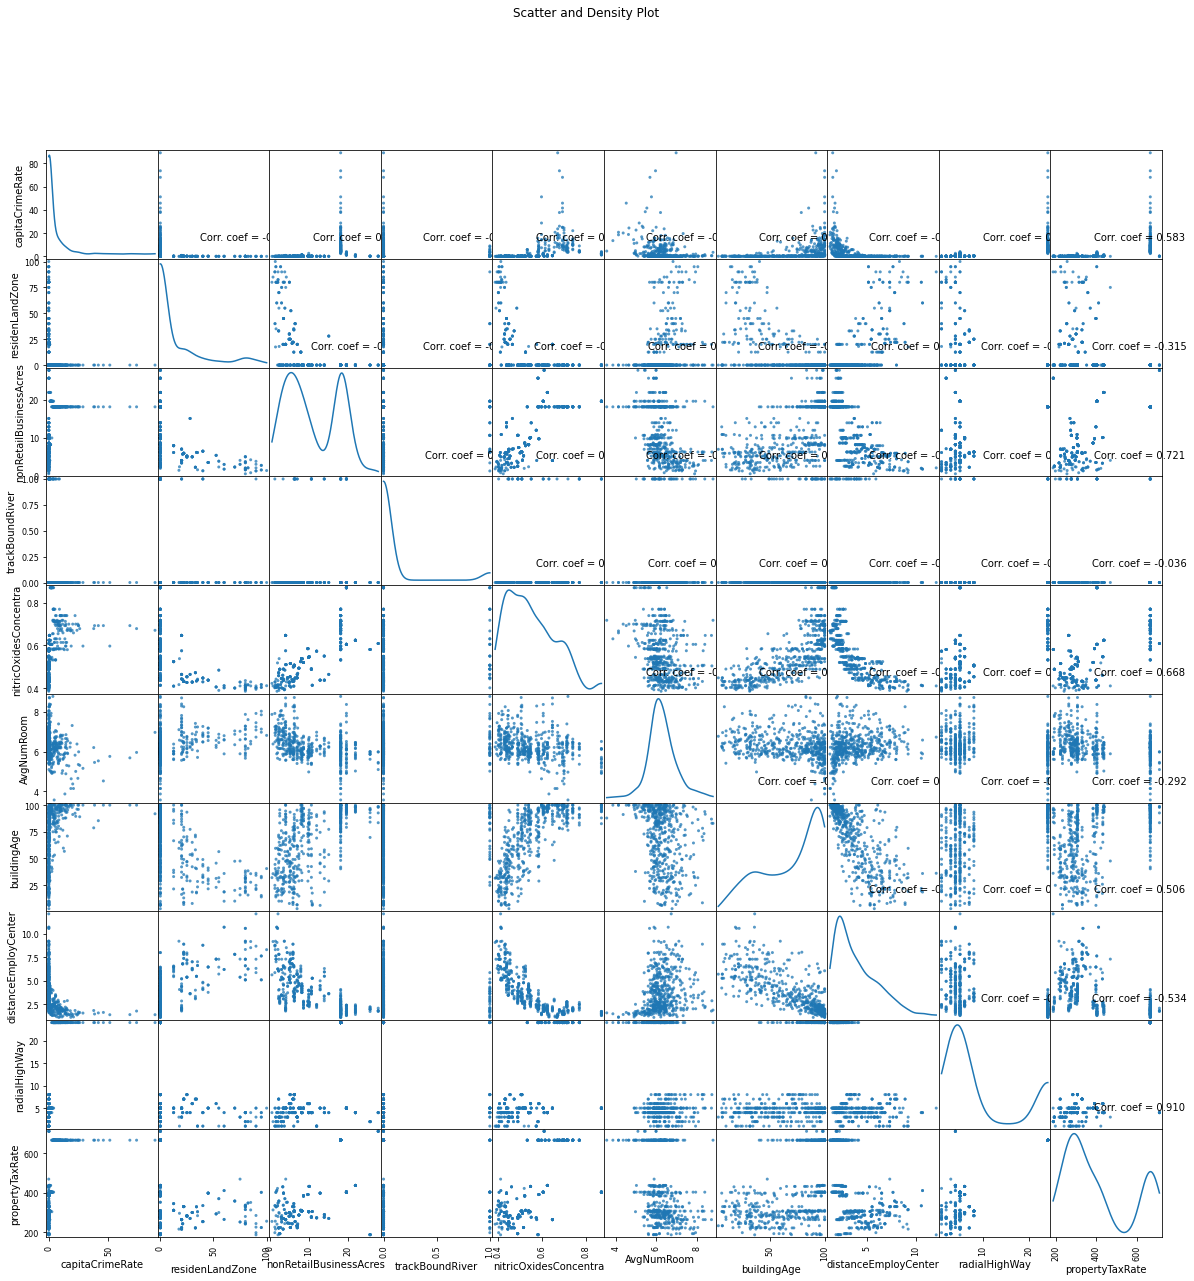

In [8]:
plotScatterMatrix(df, 20, 10)

# Data Exploration (e.g. correlation between columns)

**Correlation data**

When two sets of data are strongly linked together we say they have a High Correlation. The word Correlation is made of Co- (meaning "together"), and Relation. **Correlation is Positive when the values increase together**, and. Correlation is Negative when one value decreases as the other increases.

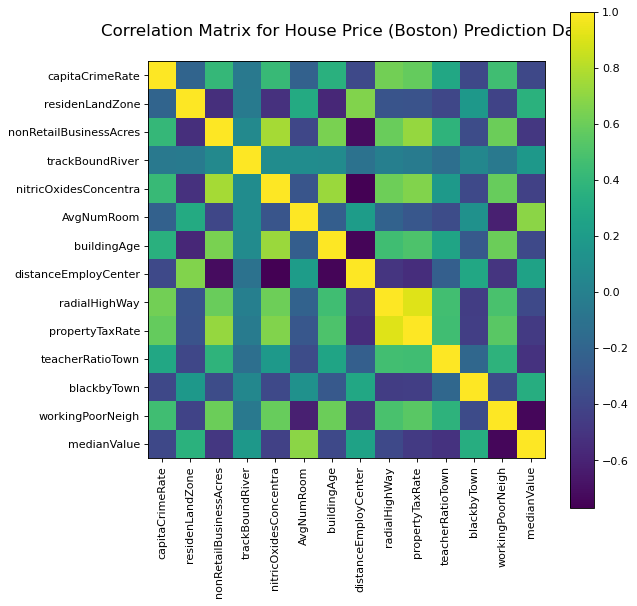

In [9]:
plotCorrelationMatrix(df, 8)

In [10]:
df.describe()

,capitaCrimeRate,residenLandZone,nonRetailBusinessAcres,trackBoundRiver,nitricOxidesConcentra,AvgNumRoom,buildingAge,distanceEmployCenter,radialHighWay,propertyTaxRate,teacherRatioTown,blackbyTown,workingPoorNeigh,medianValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.shape

(506, 14)

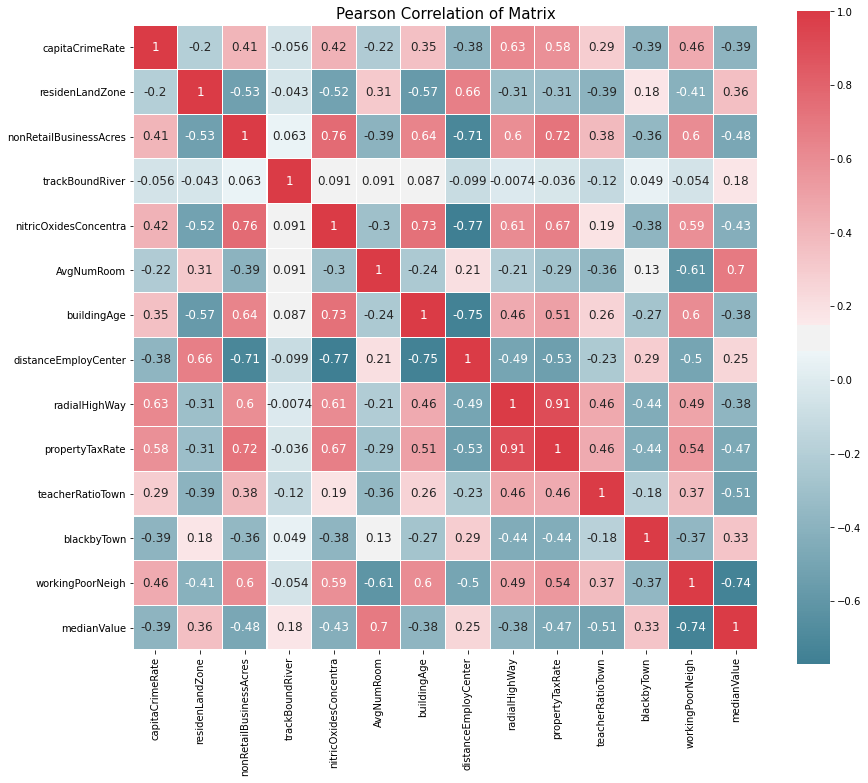

In [12]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Matrix', y=1.05, size=15)

correlation_heatmap(df)

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

## Data Visualization (e.g. value distribution of columns)

In [13]:
df_medianValue = df['medianValue']
df_main = df.drop(['capitaCrimeRate','residenLandZone','nonRetailBusinessAcres','nitricOxidesConcentra','distanceEmployCenter','radialHighWay','trackBoundRiver'], axis = 1)
df_others = df_main.drop('medianValue', axis = 1)

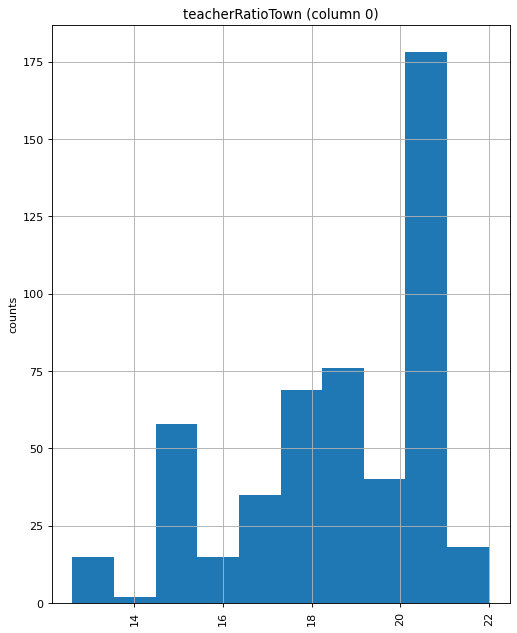

In [14]:
plotPerColumnDistribution(df_main, 10, 5)

In [15]:
df_main.head(5)

,AvgNumRoom,buildingAge,propertyTaxRate,teacherRatioTown,blackbyTown,workingPoorNeigh,medianValue
0,6.575,65.2,296.0,15.3,396.90,4.98,24.0
1,6.421,78.9,242.0,17.8,396.90,9.14,21.6
2,7.185,61.1,242.0,17.8,392.83,4.03,34.7
3,6.998,45.8,222.0,18.7,394.63,2.94,33.4
4,7.147,54.2,222.0,18.7,396.90,5.33,36.2


In [16]:
df_others.head(5)

,AvgNumRoom,buildingAge,propertyTaxRate,teacherRatioTown,blackbyTown,workingPoorNeigh
0,6.575,65.2,296.0,15.3,396.90,4.98
1,6.421,78.9,242.0,17.8,396.90,9.14
2,7.185,61.1,242.0,17.8,392.83,4.03
3,6.998,45.8,222.0,18.7,394.63,2.94
4,7.147,54.2,222.0,18.7,396.90,5.33


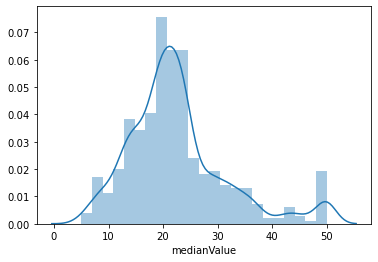

In [17]:
sns.distplot(df['medianValue']);

# Feature Engineering and Bias Detection

**Feature engineering** is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself. A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model. 

**Detection bias** refers to systematic differences between groups in how outcomes are determined. Blinding (or masking) of outcome assessors may reduce the risk that knowledge of which intervention was received, rather than the intervention itself, affects outcome measurement.

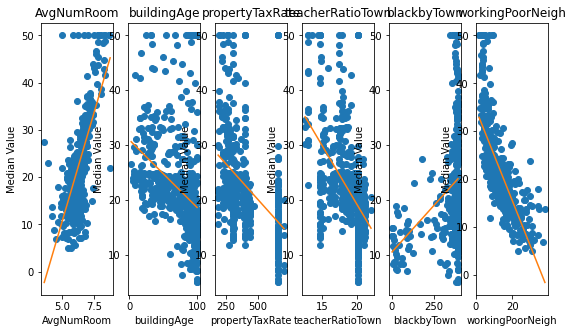

In [18]:
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(df_others.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 13, i+1)
    x = df[col]
    y = df_medianValue
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Median Value')

value increase if number of room increase. 

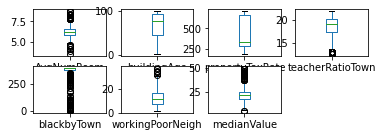

In [19]:
# box and whisker plots
df_main.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

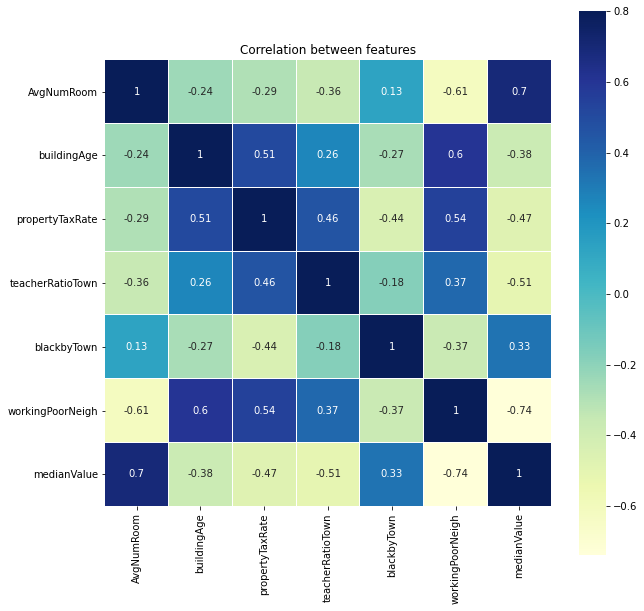

In [20]:
corr=df_main.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Histogram

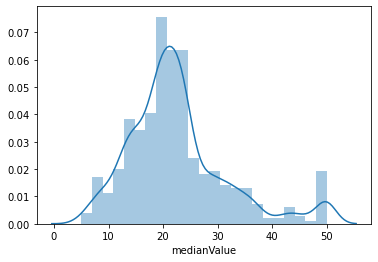

In [21]:
from scipy import stats
sns.distplot(df_medianValue, hist=True);

Normal Probability Plot

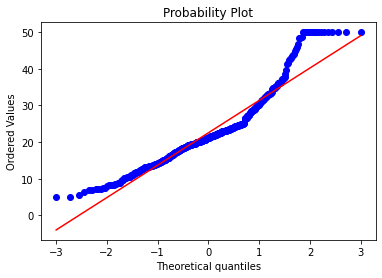

In [22]:
fig = plt.figure()
res = stats.probplot(df_medianValue, plot=plt)

# **Type A : Machine Learning Algorithms**

Prepare Data

In [23]:
array = df_main.values
X = array[:,0:5]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Root Mean Square Error Method

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [24]:
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [25]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

**KFold** will provide train/test indices to split data in train and test sets. It will split dataset into k consecutive folds (without shuffling by default). Each fold is then used a validation set once while the k - 1 remaining folds form the training set ****

**k-Fold Cross-Validation:** Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

In [26]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: -17.937321 (7.519960)
LASSO: -20.337040 (8.538767)
EN: -22.375665 (9.473835)
KNN: -28.503738 (10.393215)
CART: -34.562953 (10.580458)
SVR: -33.767570 (12.147027)


# Selection and justification of Model Performance Indicator (e.g. F1 score)

A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms. An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0 .

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).




**Algorithm Comparison**

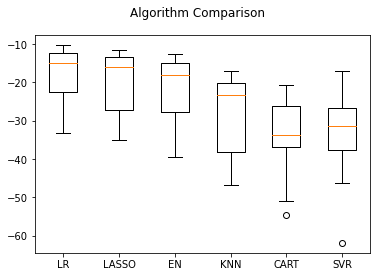

In [27]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Model performance between different feature engineerings and models compared

In [28]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR: -17.937321 (7.519960)
ScaledLASSO: -20.091120 (7.327182)
ScaledEN: -21.447979 (7.941276)
ScaledKNN: -18.759003 (7.918073)
ScaledCART: -36.247790 (13.493768)
ScaledSVR: -19.485048 (7.108845)


**Scaled Algorithm Comparison**

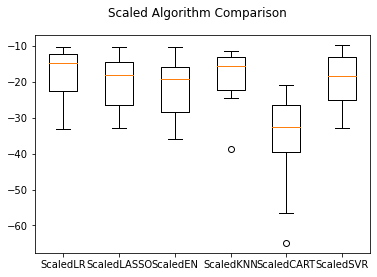

In [29]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# **KNN Algorithm tuning**

"The k-nearest neighbors algorithm (KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression”-Wikipedia

In [30]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
df_others.shape

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -18.645133 using {'n_neighbors': 5}
-28.273304 (12.801835) with: {'n_neighbors': 1}
-19.965598 (8.921632) with: {'n_neighbors': 3}
-18.645133 (7.969106) with: {'n_neighbors': 5}
-18.679680 (7.286182) with: {'n_neighbors': 7}
-19.098775 (7.143810) with: {'n_neighbors': 9}
-19.118281 (6.898205) with: {'n_neighbors': 11}
-18.686190 (6.604902) with: {'n_neighbors': 13}
-18.709216 (6.943202) with: {'n_neighbors': 15}
-19.042932 (7.342683) with: {'n_neighbors': 17}
-18.932321 (7.125283) with: {'n_neighbors': 19}
-18.908263 (7.066472) with: {'n_neighbors': 21}


(506, 6)

# Hyperparameter Optimization

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss.Cross-validation is often used to estimate this generalization performance.

**Ensembles :** ensembles combine predictions from different models to generate a final prediction, and the more models we include the better it performs

In [31]:
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
df_others.shape

ScaledKNN: -18.759003 (7.918073)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -20.065569 (7.226198)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -16.988546 (6.872938)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF: -17.231965 (5.594832)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET: -18.682698 (7.543415)


(506, 6)

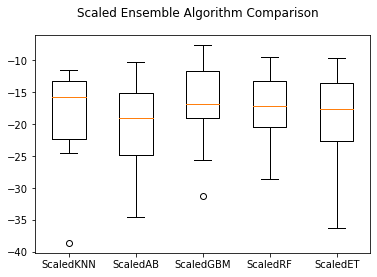

In [32]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**StandardScaler :** StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler makes the mean of the distribution 0.

It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

In [33]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -16.870568 using {'n_estimators': 50}
-16.870568 (6.237802) with: {'n_estimators': 50}
-17.018672 (6.844529) with: {'n_estimators': 100}
-17.582302 (7.241619) with: {'n_estimators': 150}
-17.732092 (7.546670) with: {'n_estimators': 200}
-18.068678 (7.716572) with: {'n_estimators': 250}
-18.221240 (7.823391) with: {'n_estimators': 300}
-18.411614 (7.918521) with: {'n_estimators': 350}
-18.548632 (8.014891) with: {'n_estimators': 400}


# Gradient boosting

**Gradient boosting** is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [34]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

27.72069743575909


Mean Squared Error=1N∑i=1N(yi−yi^)2

# **Deep Learning Algorithms**

Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled. Also known as deep neural learning or deep neural network.

In [35]:
#pip install scikit-learn=='.13'

In [36]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


**Neural network models** Artificial neural networks are forecasting methods that are based on simple mathematical models of the brain. They allow complex nonlinear relationships between the response variable and its predictors.

**Sub Type I : Baseline Neural Network Model**

In [37]:
# split into input (X) and output (Y) variables
array = df.values
X = array[:,0:13]
Y = array[:,13]

**KerasRegressor**

**Keras deep learning library for modeling regression problems**

In [38]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [39]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -27.26 (21.53) MSE


**Sub Type II : Scikit-learn Pipeline Framework**

In [40]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [41]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -30.58 (27.55) MSE


**Sub Type III : Wider Network Topology**

In [42]:
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


In [43]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -22.21 (24.67) MSE


**Sub Type IV : Deeper Network Topology**

In order to improve classification performance without increasing network depth, a new Deep Topology Network (DTN) framework is proposed. The key idea of DTN is based on the iteration of multiple learning rate feedback. The framework consists of multiple sub-networks and each sub-network has its own learning rate. After the determined iteration period, these learning rates can be adjusted according to the feedback of training accuracy, in the feature learning process, the optimal learning rate is updated iteratively to optimize the loss function.

In [44]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [45]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -23.20 (25.68) MSE
